In [52]:
import glob
import json
import os

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format="retina"
plt.rcParams["figure.figsize"] = (10, 5)

In [65]:
model_name = "9b-it"
assert model_name in ["2b", "2b-it", "9b", "9b-it"]

In [66]:
evaluator_name = "openai"
assert evaluator_name in ["openai", "number"]

In [67]:
results_path = f"../original_results/model=recurrentgemma-{model_name}_eval={evaluator_name}"
results_path

'../original_results/model=recurrentgemma-9b-it_eval=openai'

In [68]:
results_path = "../results"
json_files = glob.glob(f"{results_path}/*.json")

data = []
for file in json_files:
    with open(file, "r") as fp:
        json_data = json.load(fp)
        document_depth = json_data.get("depth_percent", None)
        context_length = json_data.get("context_length", None)
        score = json_data.get("score", None)
        data.append({
            "doc_depth": document_depth,
            "ctx_len": context_length,
            "score": score
        })
results_df = pd.DataFrame(data)

print(f"total-enties={len(results_df)} loaded from {results_path}:")
results_df.head()

total-enties=100 loaded from ../results:


,doc_depth,ctx_len,score
0,0.0,500,7
1,10.0,500,7
2,20.0,500,10
3,30.0,500,10
4,40.0,500,10


In [69]:
pivot_table = pd.pivot_table(
    results_df,
    values="score",
    index=["doc_depth", "ctx_len"],
    aggfunc="mean",
).reset_index()
pivot_table = pivot_table.pivot(index="doc_depth", columns="ctx_len", values="score")
pivot_table.head()

ctx_len,500,1000,2000,2048,3000,4000,5000,6000,7000,8000
doc_depth,,,,,,,,,,
0.0,7.0,7.0,10.0,10.0,10.0,1.0,7.0,5.0,7.0,5.0
10.0,7.0,10.0,10.0,10.0,10.0,5.0,5.0,7.0,5.0,NaN
20.0,10.0,10.0,10.0,10.0,7.0,3.0,10.0,3.0,7.0,NaN
30.0,10.0,10.0,10.0,10.0,10.0,1.0,7.0,3.0,5.0,NaN
40.0,10.0,10.0,10.0,10.0,10.0,7.0,3.0,5.0,7.0,NaN


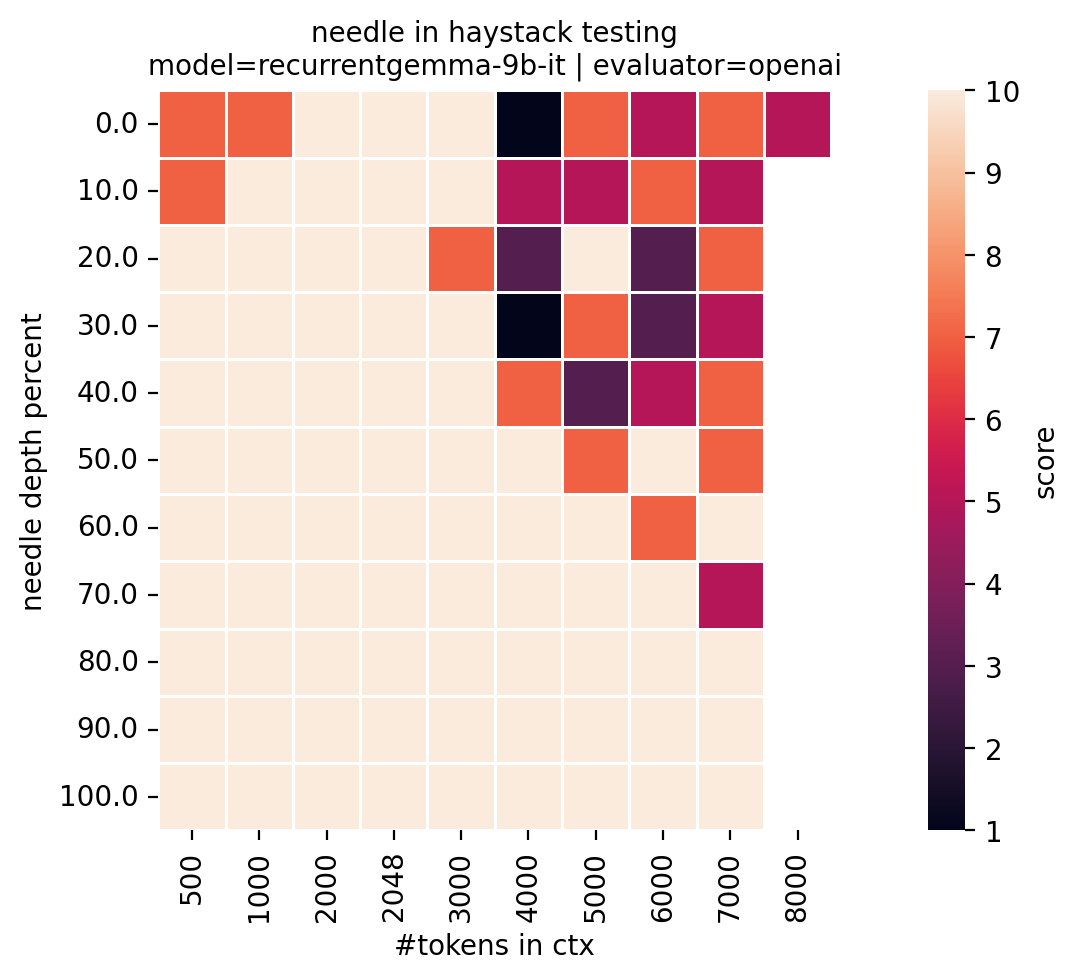

In [71]:
sns.heatmap(pivot_table, fmt="g", cbar_kws={"label": "score"}, square=True, annot=False, linewidth=0.4)

plt.title(f"needle in haystack testing\nmodel=recurrentgemma-{model_name} | evaluator={evaluator_name}", fontsize=10)
plt.xlabel("#tokens in ctx")
plt.ylabel("needle depth percent")
plt.tight_layout()

plt.show()